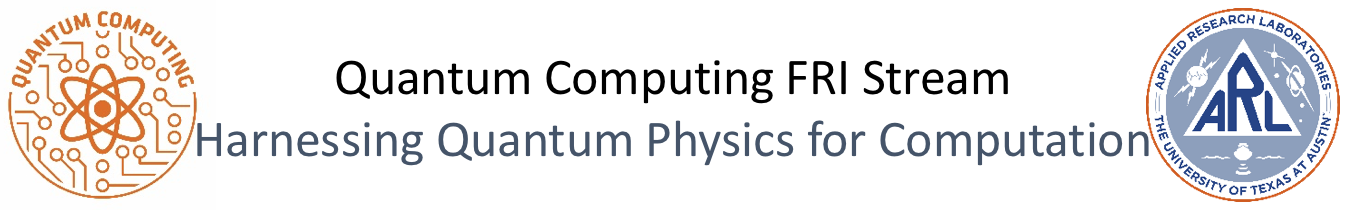

# Quantum Computing Basics
## Lesson 3

## Installations and Imports

In [1]:
%pip install qiskit
%pip install qiskit-aer

#You may need to restart the runtime for this change to take effect
%pip install pylatexenc
%pip install qiskit_ibm_runtime

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.primitives import Sampler, StatevectorSampler, Estimator, StatevectorEstimator
import numpy as np

sampler = StatevectorSampler()
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# #You can check if you have qiskit by attempting to import it or by checking the version
# import qiskit
# qiskit.__version__

In [ ]:
"""consult this for histogram"""

# backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

# job = transpile(qc, backend)
# results = sampler.run([qc]).result()
# data_pub = results[0].data
# counts = data_pub.c0.get_counts()

# #counts=execute(qc, backend, shots=1024).result().get_counts(qc)

# plot_histogram(counts)

## Today's Objectives

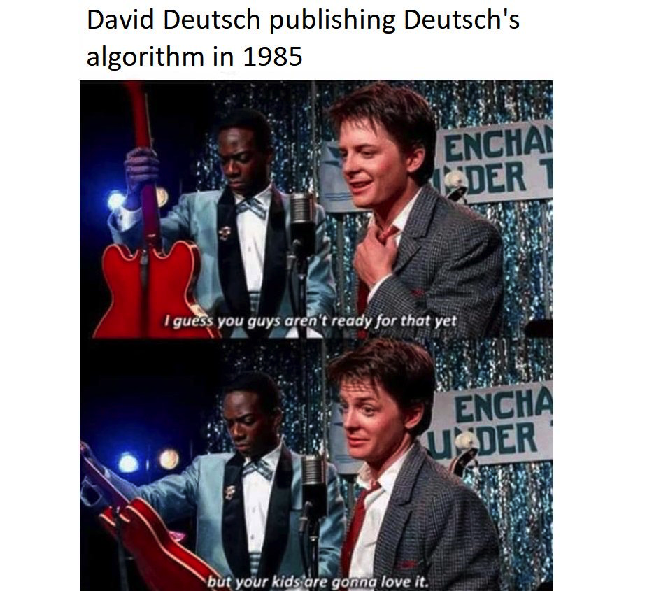

 - Discuss the significance of input and output registers
 - Map a Boolean function to a unitary operation
 - "Derive" a computational speedup with a quantum algorithm
 - Implement the first quantum algorithm in Qiskit

## Functions on Input and Output Registers

An important aspect of quantum operations is that they are REVERSIBLE.

This implies that the same number of bits must go into a logical operation as come out of that operation. We divide the space into the input and output in order to help keep track of our bits. Don't let the names fool you; both the input and output are present before and after the logic gate!

### Input and Output Registers

In this class we will follow the convention that the __LEAST__ significant qubit registers hold the output.

$$ |x\rangle \otimes |y\rangle = |x\rangle|y\rangle=|x,y\rangle$$


$$x =n\text{-bit input register}$$
$$y =m\text{-bit output register}$$



And, as a reminder, we also use Little Endian notation such that the least significant qubit is called qubit zero and is in the rightmost position.

### Functions and unitaries

$$\text{Imagine some function, }f\text{, which maps }n\text{-bit integers to }m\text{-bit integers.}$$

$$f(\{0,1\}^{n})=\{0,1\}^{m}$$

$$\text{Then }\mathbf{U}_{f}\text{ is a unitary operator that realizes the function }f$$

$$\mathbf{U}_{f}|x\rangle|y\rangle=|x\rangle|y\oplus f(x)\rangle$$

$$\text{Here }\oplus\text{ is bitwise addition modulo-2}$$

$$0\oplus 0=0\quad 0\oplus1=1\quad 1\oplus0=1\quad 1\oplus1=0$$

$$\mathbf{U}_{f}\mathbf{U}_{f}|x\rangle|y\rangle=|x\rangle|y\oplus f(x)\oplus f(x)\rangle=|x\rangle|y\rangle$$

### Simple Example

$$\text{Suppose }f\text{ maps one bit to one bit (i.e. }n=m=1\text{)}$$

There are only four such functions:

<table>
<tr>  
  <th><font size='8'>$f_{00}$</th><th></th>
  <th><font size='8'>$f_{01}$</th><th></th>
  <th><font size='8'>$f_{10}$</th><th></th>
  <th><font size='8'>$f_{11}$</th>
 </tr>
 <tr>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 0 |
|<font size='8'>1|-|<font size='8'> 0 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 1 |
|<font size='8'>1|-|<font size='8'> 1 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 0 |
|<font size='8'>1|-|<font size='8'> 1 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 1 |
|<font size='8'>1|-|<font size='8'> 0 |

  </td>
 </tr>

</table>

$$\text{So we arrive at the question: }\\ \text{What is the unitary, }\mathbf{U}_{f}\text{, which implements each of these functions?}$$

It's definitely CNOT control 1 target 0

$$\text{Let's start with }\mathbf{U}_{f_{10}}\text{ and try all the possibilities manually.}$$

$$\mathbf{U}_{f_{10}}|0\rangle|0\rangle=|0\rangle|0\oplus f_{10}(0)\rangle=|0\rangle|0\oplus0\rangle=|0\rangle|0\rangle$$

$$\mathbf{U}_{f_{10}}|0\rangle|1\rangle=|0\rangle|1\oplus f_{10}(0)\rangle=|0\rangle|1\oplus0\rangle=|0\rangle|1\rangle$$

$$\mathbf{U}_{f_{10}}|1\rangle|0\rangle=|1\rangle|0\oplus f_{10}(1)\rangle=|1\rangle|0\oplus1\rangle=|1\rangle|1\rangle$$

$$\mathbf{U}_{f_{10}}|1\rangle|1\rangle=|1\rangle|1\oplus f_{10}(1)\rangle=|1\rangle|1\oplus1\rangle=|1\rangle|0\rangle$$

#### <font color=orange> Spoiler </font>

$$\text{So }\mathbf{U}_{f_{10}}=\mathbf{C}_{10}$$

### <font color=green> Exercise 1 </font>

Use Aer's qasm_simulator backend to verify the action of $\mathbf{U}_{f_{10}}=\mathbf{C}_{10}$ for each of the 4 possible inputs.

In [7]:
# %pip install qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.2 MB/s eta 0:00:00


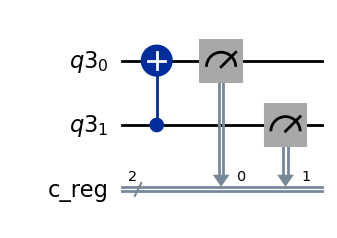

In [6]:
# hint: import these
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# from qiskit import Aer, execute
# from qiskit.visualization import plot_histogram

# hint: write the code for your quantum circuit
q = QuantumRegister(2)
c = ClassicalRegister(2, "c_reg")
qc = QuantumCircuit(q, c)

# qc.x(q[0]) enable these for the 11 initial state
# qc.x(q[1])

# use qc.x(q[0]) OR qc.x(q[1]) for 01 OR 10 state respectively


qc.cx(q[1],q[0]) #this is all that's needed for 00 initial state
qc.measure(q,c)
qc.draw('mpl')

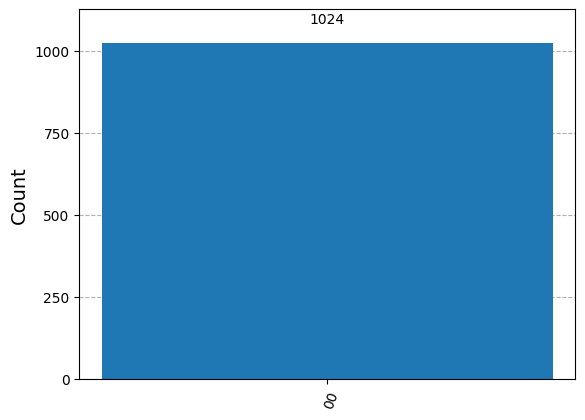

In [7]:
# hint: execute these
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = transpile(qc, backend)
results = sampler.run([qc]).result()
data_pub = results[0].data
counts = data_pub.c_reg.get_counts()

#counts=execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)

### Statevector Example

Last lesson we learned to use Aer's qasm simulator to sample our circuits.

This lesson we will also use Qiskit's statevector functionality to evolve our states according to our circuits.

In [8]:
#from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

First we want to create our statevector. We can initialize it using the "from_label" method on a statevector.

In [9]:
#Create a statevector from a bitstring label
vec00 = Statevector.from_label('00')
vec00.data

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

As you may have noticed, we will need to be able to convert between notations on the fly.

Recall column vector forms from last semester. These multi-qubit basis states are tensor products of the single-qubit basis states.

$$\vert 0\rangle = \begin{bmatrix}1\\0\end{bmatrix}\qquad\vert 1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

$$\vert 00\rangle = \vert 0\rangle \otimes \vert 0\rangle = \begin{bmatrix}1\\0\\0\\0\end{bmatrix}\qquad
\vert 01\rangle = \vert 0\rangle \otimes \vert 1\rangle = \begin{bmatrix}0\\1\\0\\0\end{bmatrix}\qquad
\vert 10\rangle = \vert 1\rangle \otimes \vert 0\rangle = \begin{bmatrix}0\\0\\1\\0\end{bmatrix}\qquad
\vert 11\rangle = \vert 1\rangle \otimes \vert 1\rangle = \begin{bmatrix}0\\0\\0\\1\end{bmatrix}$$

We can evolve our state vector by creating a quantum circuit and then using the evolve method on the statevector.

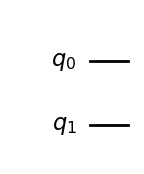

In [10]:
#Initialize the quantum circuit
qc = QuantumCircuit(2)
qc.draw(output='mpl')

$$\text{Since }\mathbf{U}_{f_{10}}=\mathbf{C}_{10}\text{ we'll add that gate}$$

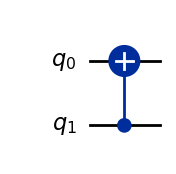

In [11]:
#Add the chosen gate
qc.cx(1,0)
qc.draw(output='mpl')

In [12]:
#Evolve the state vector according to the circuit
new00=vec00.evolve(qc)
new00.data

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

With our quantum circuit object already defined, we can create more statevectors to try out the other possible inputs.

In [13]:
#Create a statevector from a bitstring label
vec01=Statevector.from_label('01')
#Evolve the state vector according to the circuit
new01=vec01.evolve(qc)
new01.data

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

In [14]:
#Create a statevector from a bitstring label
vec10=Statevector.from_label('10')
#Evolve the state vector according to the circuit
new10=vec10.evolve(qc)
new10.data

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [15]:
#Create a statevector from a bitstring label
vec11=Statevector.from_label('11')
#Evolve the state vector according to the circuit
new11=vec11.evolve(qc)
new11.data

array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

And you can see that this matches with our worked out answers from above.

$$\mathbf{U}_{f_{10}}|0\rangle|0\rangle=|0\rangle|0\oplus f_{10}(0)\rangle=|0\rangle|0\oplus0\rangle=|0\rangle|0\rangle$$

$$\mathbf{U}_{f_{10}}|0\rangle|1\rangle=|0\rangle|1\oplus f_{10}(0)\rangle=|0\rangle|1\oplus0\rangle=|0\rangle|1\rangle$$

$$\mathbf{U}_{f_{10}}|1\rangle|0\rangle=|1\rangle|0\oplus f_{10}(1)\rangle=|1\rangle|0\oplus1\rangle=|1\rangle|1\rangle$$

$$\mathbf{U}_{f_{10}}|1\rangle|1\rangle=|1\rangle|1\oplus f_{10}(1)\rangle=|1\rangle|1\oplus1\rangle=|1\rangle|0\rangle$$

### <font color=green> Exercise 2 </font>

$$\text{Find the corresponding }\mathbf{U}_{f}\text{ for the other three single-qubit funcitons.}$$

<table>
<tr>  
  <th><font size='8'>$f_{00}$</th><th></th>
  <th><font size='8'>$f_{01}$</th><th></th>
  <th><font size='8'>$f_{11}$</th>
 </tr>
 <tr>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 0 |
|<font size='8'>1|-|<font size='8'> 0 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 1 |
|<font size='8'>1|-|<font size='8'> 1 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 1 |
|<font size='8'>1|-|<font size='8'> 0 |

  </td>
 </tr>

</table>

Remember the action of a unitary
$$\mathbf{U}_{f}|x\rangle|y\rangle=|x\rangle|y\oplus f(x)\rangle$$

f10 is the CXNOT gate controlling 1 and targetting 0, f11 is the CXNOT gate controlling 1 and targetting 0 with an X gate on q0, f00 is the identity, and f01 is the x gate on q0

## Deutsch's Problem
D. Deutsch, Proc. R. Soc. A 400 97 (1985)

We are given a black box with the promise that it implements one of our four single-bit functions from above.

Two of the functions are constant (i.e. they produce the same value regardless of input) and two of them are balanced (i.e. they produce 0 half the time and 1 half the time.)

<table>
<tr>  
  <th></th><th><font size='8'>Constant</th><th></th>

 </tr>
<tr>  
  <th><font size='8'>$f_{00}$</th><th></th>
  <th><font size='8'>$f_{01}$</th><th></th>
 </tr>
 <tr>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 0 |
|<font size='8'>1|-|<font size='8'> 0 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 1 |
|<font size='8'>1|-|<font size='8'> 1 |

  </td>
 </tr>

</table>
$\\$

<table>
<tr>  
  <th></th><th><font size='8'>Balanced</th><th></th>
 </tr><tr>  
  <th><font size='8'>$f_{10}$</th><th></th>
  <th><font size='8'>$f_{11}$</th>
 </tr>
 <tr>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 0 |
|<font size='8'>1|-|<font size='8'> 1 |

  </td><td></td>
  <td>

|<font size='8'>x|-|<font size='8'>f(x)|
|--|--|--|
|<font size='8'>0|-|<font size='8'> 1 |
|<font size='8'>1|-|<font size='8'> 0 |

  </td>
 </tr>

</table>

### Question:

$$\text{How many evaluations of the function }f\text{ are required to decide if the function is constant or balanced?}$$


$$\text{If given a quantum black box, how many evaluations of the unitary }\mathbf{U}_{f}\text{ are required to decide if the function is constant or balanced?}$$

we need two evaluations to test the function; however, with a unitary, we only need one

### Deutsch's Algorithm

$\begin{align}
\text{1. Start with the all zero state }|00\rangle
\end{align}
$

$\begin{align}
\text{2. Set the output register to }|1\rangle
\end{align}
$

$\begin{align}
\text{3. Apply Hadamard gates to all qubits}
\end{align}
$

$\begin{align}
\text{4. Apply the }``\text{unknown" unitary to the qubits}
\end{align}
$

$\begin{align}
\text{5. Apply another set of Hadamard gates to all the qubits}
\end{align}
$

$\begin{align}
\text{6. Measure the input register}
\end{align}
$

$\begin{align}
\text{7. If the outcome is 0, the function is constant; otherwise it's balanced}
\end{align}
$

#### Example: the math behind the algorithm.

$\mathbf{H}_{1}\mathbf{H}_{0}|0\rangle |1\rangle = \frac{1}{2}\big[|0\rangle |0\rangle-|0\rangle |1\rangle+|1\rangle |0\rangle-|1\rangle |1\rangle\big]$

$\mathbf{H}_{1}\mathbf{H}_{0}\mathbf{U}_{f_{00}}\mathbf{H}_{1}\mathbf{H}_{0}|0\rangle |1\rangle = \mathbf{H}_{1}\mathbf{H}_{0}\frac{1}{2}\big[+|0\rangle |0\rangle-|0\rangle |1\rangle+|1\rangle |0\rangle-|1\rangle |1\rangle\big]=\color{red}{|0\rangle |1\rangle}$

$\mathbf{H}_{1}\mathbf{H}_{0}\mathbf{U}_{f_{01}}\mathbf{H}_{1}\mathbf{H}_{0}|0\rangle |1\rangle = \mathbf{H}_{1}\mathbf{H}_{0}\frac{1}{2}\big[-|0\rangle |0\rangle+|0\rangle |1\rangle-|1\rangle |0\rangle+|1\rangle |1\rangle\big]=\color{red}{-|0\rangle |1\rangle}$

$\mathbf{H}_{1}\mathbf{H}_{0}\mathbf{U}_{f_{10}}\mathbf{H}_{1}\mathbf{H}_{0}|0\rangle |1\rangle = \mathbf{H}_{1}\mathbf{H}_{0}\frac{1}{2}\big[+|0\rangle |0\rangle-|0\rangle |1\rangle-|1\rangle |0\rangle+|1\rangle |1\rangle\big]=\color{red}{|1\rangle |1\rangle}$

$\mathbf{H}_{1}\mathbf{H}_{0}\mathbf{U}_{f_{11}}\mathbf{H}_{1}\mathbf{H}_{0}|0\rangle |1\rangle = \mathbf{H}_{1}\mathbf{H}_{0}\frac{1}{2}\big[-|0\rangle |0\rangle+|0\rangle |1\rangle+|1\rangle |0\rangle-|1\rangle |1\rangle\big]=\color{red}{-|1\rangle |1\rangle}$

### <font color=green> Exercise 3 </font>

Using either the statevector methods shown above or the qasm simulator from last lesson, use Qiskit to demonstrate that Deutsch's algorithm does indeed work.

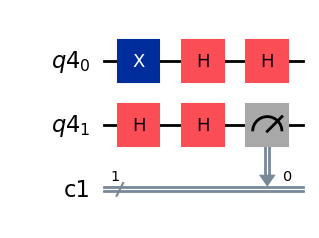

In [16]:
qDJ = QuantumRegister(2)
cDJ = ClassicalRegister(1)
qcDJ = QuantumCircuit(qDJ, cDJ)

# initialize 01
qcDJ.x(qDJ[0])

# apply hadamard gates to all
qcDJ.h(qDJ[0])
qcDJ.h(qDJ[1])

# the unknown unitary

# f10, balanced and will give 1
#qcDJ.cx(qDJ[1],qDJ[0])

# f11, balanced and will give 1
#qcDJ.cx(qDJ[1],qDJ[0])
#qcDJ.x(qDJ[0])

# f00, constant and will give 0
#qcDJ.i(qDJ[0])

# f01, constant and will give 0
#qcDJ.x(qDJ[0])

# apply hadamard gates to all, again
qcDJ.h(qDJ[0])
qcDJ.h(qDJ[1])

# measure the input register
qcDJ.measure(qDJ[1], cDJ)

qcDJ.draw('mpl')

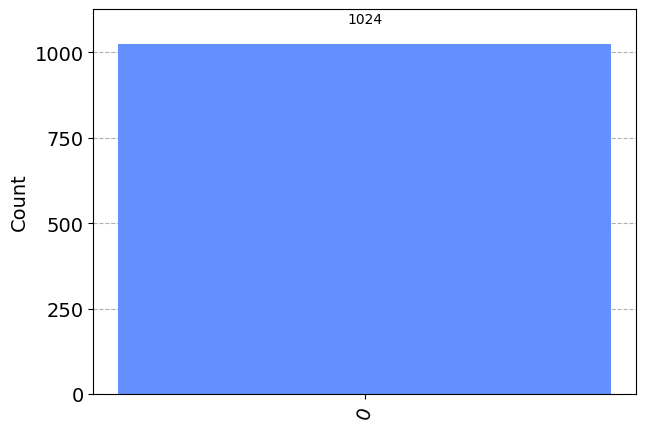

In [65]:
backend = Aer.get_backend('qasm_simulator')
counts=execute(qcDJ, backend, shots=1024).result().get_counts(qcDJ)
plot_histogram(counts)

## The Deutsch-Jozsa Problem

$\begin{align}
\text{Consider a Boolean function }f\text{ mapping }n\text{ bits to 1 bit.}\left(N = 2^{n}\text{ input values}\right)
\end{align}
$

$
\begin{align}
\text{We are once again promised that this function is either constant or balanced.}
\end{align}
$

$
\begin{align}
\text{At worst, we will need }\frac{N}{2}+1\text{ evaluations of }f\text{ to decide.}
\end{align}
$

$
\begin{align}
\text{Only *one* evaluation of }\mathbf{U}_{f}\text{ is needed!}
\end{align}
$

### Implementation

$
\begin{align}
\text{The number of either constant or balanced functions is }2+\binom{N}{N/2}
\end{align}
$

$
\begin{align}
\text{We simply need to construct unitaries }\mathbf{U}_{f}\text{ to implement our unknown function.}
\end{align}
$

$
\begin{align}
\text{We then apply the Deutsch algorithm as before.}
\end{align}
$

#### Unitary Construction


We can restrict to a subset of more easily constructed functions as follows:


$
\begin{align}
&\\
&\text{Let }a=\left[a_{n} \dots a_{1}a_{0}\right]\text{ be any integer of }n+1 \text{ bits.}\\
&\\
&\text{Define }\mathbf{U}_{f}=\mathbf{C}^{a_{n}}_{n0}\dots\mathbf{C}^{a_{1}}_{10}\mathbf{X}^{a_{0}}_{0}\quad\text{(Note: }\mathbf{A}^{0}=\mathbf{I}, \mathbf{A}^{1}=\mathbf{A}\text{)}
\end{align}
$

*Example bitstring*

a=1010

0th bit = 0    I_0

1th bit = 1    C_10

2th bit = 0    I_0

3th bit = 1    C_30

#### Deutsch-Jozsa

We then apply Deutsch's algorithm as before.

The function is constant if (and only if) the input register is measured in the all zero state.

In Homework 2, you will implement the Deutsch-Jozsa algorithm for an n-qubit input.

(n should be arbitrary but it can help to consider values like 2, 3, and 10 when prototyping your function.)